### creating a deep neural network model to classify whether a fish in an image is healthy or sick. The provided data has approximately 200 images of healthy fish and 300 images of sick fish, distributed among 6 different diseases. 

### Import libraries

In [1]:
#Load libraries
import os
import numpy as np
import matplotlib.pyplot as plt
from keras.preprocessing.image import load_img, img_to_array,ImageDataGenerator
from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from keras.regularizers import l2
from tensorflow.keras.optimizers import Adam
from sklearn.metrics import classification_report, confusion_matrix

### Load and Preprocess data

In [2]:

# path of fish dataset
path = 'fish' 
classes = os.listdir(path)
print(classes)


['Bacterial diseases - Aeromoniasis', 'Bacterial gill disease', 'Bacterial Red disease', 'Fungal diseases Saprolegniasis', 'Healthy Fish', 'Parasitic diseases', 'Viral diseases White tail disease']


In [3]:
# Load images and labels
data = []
labels = []

for class_name in classes:
    class_directory = os.path.join(path, class_name)
    print(class_directory)

    for file_name in os.listdir(class_directory):
        image_path = os.path.join(class_directory, file_name)
        image = load_img(image_path, target_size=(128, 128))  # Adjust target_size as needed
        image_array = img_to_array(image)
        data.append(image_array)
        labels.append(1 if class_name != 'Healthy Fish' else 0)

# Convert lists to numpy arrays
data = np.array(data)
labels = np.array(labels)
labels.shape

        

fish\Bacterial diseases - Aeromoniasis
fish\Bacterial gill disease


fish\Bacterial Red disease
fish\Fungal diseases Saprolegniasis
fish\Healthy Fish
fish\Parasitic diseases
fish\Viral diseases White tail disease


(460,)

In [4]:
# Normalize the pixel values to a range between 0 and 1
data = data / 255.0

# One-Hot Encode the labels
#labels = to_categorical(labels, len(classes))
#print(labels.shape)

In [5]:
# Split the data into training, validation, and test sets
x_train, x_test, y_train, y_test = train_test_split(data, labels, test_size=0.2, random_state=42)
#x_val, x_test, y_val, y_test = train_test_split(x, y, test_size=0.5, random_state=42)

y_train = to_categorical(y_train, len(classes))
y_test = to_categorical(y_test,len(classes))

print(f'The shape of Training data :{x_train.shape},{y_train.shape} ')
#print(f'The shape of validation data :{x_val.shape},{y_val.shape} ')
print(f'The shape of test data :{x_test.shape},{y_test.shape} ')

The shape of Training data :(368, 128, 128, 3),(368, 7) 
The shape of test data :(92, 128, 128, 3),(92, 7) 


In [6]:
# Apply data augmentation
# https://www.tensorflow.org/api_docs/python/tf/keras/preprocessing/image/ImageDataGenerator
datagen = ImageDataGenerator(
    rotation_range=20,
    width_shift_range=0.2,shear_range=0.2,
    height_shift_range=0.2,zoom_range=0.2,
    horizontal_flip=True, fill_mode='nearest', validation_split=0.2)

datagen.fit(x_train)

### Create a Model

In [7]:
# Build the model
model = Sequential([
    Conv2D(filters=32, kernel_size=(3, 3), padding='same', activation='relu', input_shape=(128, 128, 3),kernel_regularizer=l2(0.01)),
    MaxPooling2D(pool_size=(2, 2)),
    Conv2D(filters=64, kernel_size=(3, 3), padding='same', activation='relu', kernel_regularizer=l2(0.01)),
    MaxPooling2D(pool_size=(2, 2)),
    Conv2D(filters=128, kernel_size=(3, 3), padding='same', activation='relu',kernel_regularizer=l2(0.01)),
    MaxPooling2D(pool_size=(2, 2)),

    Flatten(),
    Dense(128, activation='relu',kernel_regularizer=l2(0.01)),
    Dropout(rate=0.5),
    Dense(64, activation='relu',kernel_regularizer=l2(0.01)),
    Dropout(rate=0.3),
    Dense(len(classes), activation='sigmoid',kernel_regularizer=l2(0.01))
])

# Compile the model
model.compile(optimizer=Adam(learning_rate=0.001), loss='binary_crossentropy', metrics=['accuracy'])



In [8]:
# Print model summary
model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 128, 128, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2  (None, 64, 64, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 64, 64, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 32, 32, 64)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 32, 32, 128)       73856     
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 16, 16, 128)       0

### Train the model

In [9]:
# Train the model
batch_size = 32
epochs = 10 
history = model.fit(datagen.flow(x_train, y_train, batch_size=batch_size,subset='training'),
        validation_data=datagen.flow(x_train, y_train,
        batch_size=8, subset='validation'),
        epochs=epochs)

Epoch 1/10


10/10 [==============================] - 12s 832ms/step - loss: 3.8740 - accuracy: 0.4441 - val_loss: 2.4933 - val_accuracy: 0.7534
Epoch 2/10
10/10 [==============================] - 7s 683ms/step - loss: 2.2465 - accuracy: 0.5186 - val_loss: 1.8381 - val_accuracy: 0.2466
Epoch 3/10
10/10 [==============================] - 7s 696ms/step - loss: 1.6745 - accuracy: 0.5186 - val_loss: 1.4211 - val_accuracy: 0.2466
Epoch 4/10
10/10 [==============================] - 10s 998ms/step - loss: 1.3064 - accuracy: 0.4983 - val_loss: 1.0895 - val_accuracy: 0.7534
Epoch 5/10
10/10 [==============================] - 9s 838ms/step - loss: 1.0748 - accuracy: 0.5458 - val_loss: 0.9101 - val_accuracy: 0.7534
Epoch 6/10
10/10 [==============================] - 9s 875ms/step - loss: 0.9351 - accuracy: 0.5356 - val_loss: 0.8298 - val_accuracy: 0.2466
Epoch 7/10
10/10 [==============================] - 9s 815ms/step - loss: 0.8142 - accuracy: 0.5322 - val_loss: 0.7531 - val_accuracy: 0.2466
Ep

In [10]:
# Train the model
batch_size = 32
epochs = 10
#history = model.fit(datagen.flow(x_train, y_train, batch_size=batch_size), epochs=epochs, validation_data=(x_val, y_val))


### Visualize the model performance

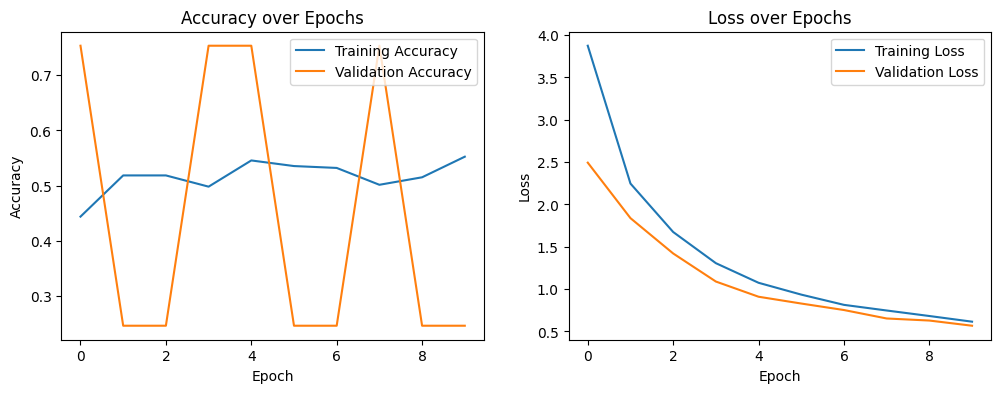

In [11]:
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Accuracy over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Loss over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.show()

### Evaluate on the test set

In [12]:
# Evaluate the model on the test set
test_loss, test_acc = model.evaluate(x_test, y_test)
print(f'Test Accuracy: {test_acc :.2f}')
print(f'Test Loss: {test_loss : .2f}')

3/3 [==============================] - 1s 146ms/step - loss: 0.5669 - accuracy: 0.3261
Test Accuracy: 0.33
Test Loss:  0.57


In [13]:
# Make predictions on the test set
predictions = model.predict(x_test)
predicted_labels = np.argmax(predictions, axis=1)
true_labels = np.argmax(y_test, axis=1)

# Print classification report
print('\nClassification Report:')
print(classification_report(true_labels, predicted_labels))

3/3 [==============================] - 1s 139ms/step

Classification Report:
              precision    recall  f1-score   support

           0       0.33      1.00      0.49        30
           1       0.00      0.00      0.00        62

    accuracy                           0.33        92
   macro avg       0.16      0.50      0.25        92
weighted avg       0.11      0.33      0.16        92



c:\Users\vinee\OneDrive\Dokument\Github\Deep-Learning\venv\lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\vinee\OneDrive\Dokument\Github\Deep-Learning\venv\lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\vinee\OneDrive\Dokument\Github\Deep-Learning\venv\lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_

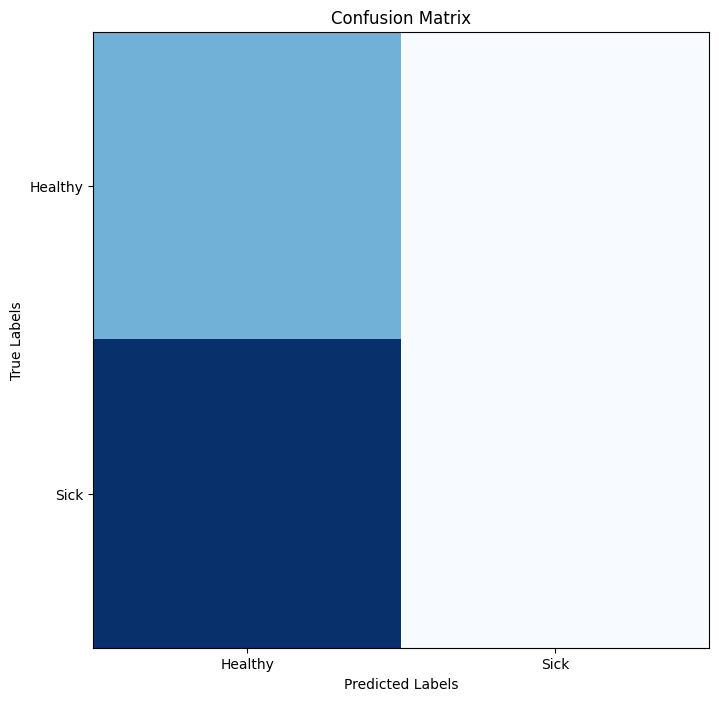

In [14]:
# Plot confusion matrix
cf_matrix = confusion_matrix(true_labels, predicted_labels)
plt.figure(figsize=(8, 8))
plt.imshow(cf_matrix, cmap='Blues', interpolation='nearest')
plt.title('Confusion Matrix')
plt.xticks(np.arange(2), ['Healthy', 'Sick'])
plt.yticks(np.arange(2), ['Healthy', 'Sick'])
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()